In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print(df.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:>

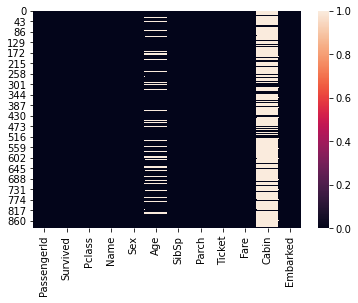

In [20]:
sns.heatmap(df.isnull())

<AxesSubplot:>

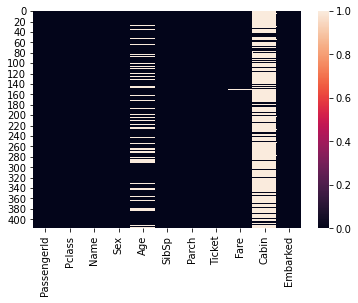

In [10]:
sns.heatmap(df_test.isnull())

<AxesSubplot:>

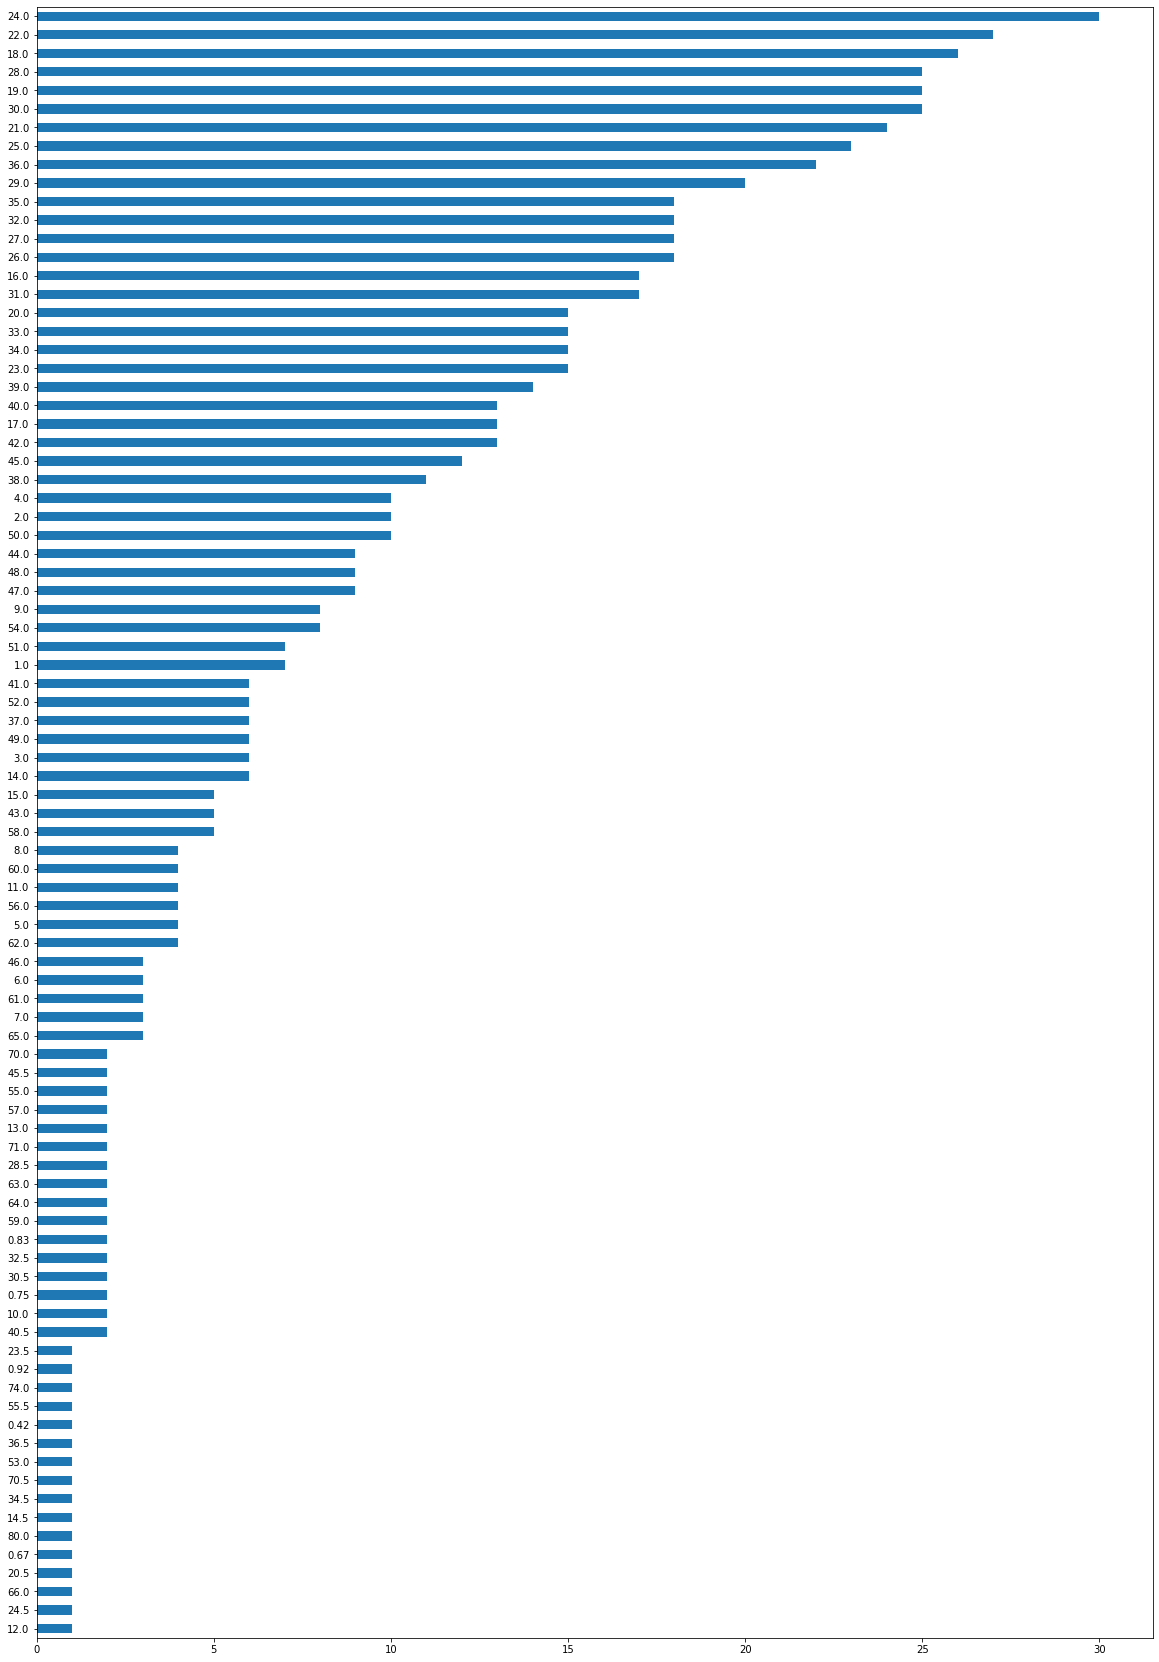

In [11]:
df.Age.value_counts().sort_values().plot(kind = 'barh', figsize=(20,30))

In [10]:
df_null_dropped = df.drop(['Cabin','Name', 'Ticket'],axis=1)
df_test_null_dropped = df_test.drop(['Cabin','Name', 'Ticket'],axis=1)

In [11]:
df_null_dropped.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [12]:
df_test_null_dropped.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [13]:
categorical_cols = [col for col in df_null_dropped.columns if df[col].dtypes=='object']
print(categorical_cols)

['Sex', 'Embarked']


In [15]:
X_train = df_null_dropped.drop('Survived', axis=1)
y_train = df_null_dropped['Survived']
X_test = df_test_null_dropped.copy()

In [16]:
print(X_train.shape)
print(X_test.shape)

(891, 8)
(418, 8)


In [17]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

ohe_X_train = pd.DataFrame(ohe.fit_transform(X_train[categorical_cols]))
ohe_X_test = pd.DataFrame(ohe.transform(X_test[categorical_cols]))

# One-hot encoding removed index, we put it back
ohe_X_train.index = X_train.index
ohe_X_test.index = X_test.index

# Remove categorical columns which will replace with one-hot encoded columns
num_X_train = X_train.drop(categorical_cols, axis=1)
num_X_test = X_test.drop(categorical_cols, axis=1)

# concating numerical and one hot encoded features
final_X_train = pd.concat([num_X_train, ohe_X_train], axis=1)
final_X_test = pd.concat([num_X_test, ohe_X_test], axis=1)

categorical_cols_X_train = [col for col in final_X_train.columns if final_X_train[col].dtypes=='object']
print(categorical_cols_X_train)
categorical_cols_X_test = [col for col in final_X_test.columns if final_X_test[col].dtypes=='object']
print(categorical_cols_X_test)

print(final_X_train.shape)
print(final_X_test.shape)

[]
[]
(891, 12)
(418, 12)


In [18]:
imputer = SimpleImputer()

imputed_X_train = pd.DataFrame(imputer.fit_transform(final_X_train))
imputed_X_test = pd.DataFrame(imputer.transform(final_X_test))

print(imputed_X_test)

#imputing removes column names, we put them back
imputed_X_train.columns = final_X_train.columns
imputed_X_test.columns = final_X_test.columns

print(imputed_X_test)

         0    1          2    3    4         5    6    7    8    9    10   11
0     892.0  3.0  34.500000  0.0  0.0    7.8292  0.0  1.0  0.0  1.0  0.0  0.0
1     893.0  3.0  47.000000  1.0  0.0    7.0000  1.0  0.0  0.0  0.0  1.0  0.0
2     894.0  2.0  62.000000  0.0  0.0    9.6875  0.0  1.0  0.0  1.0  0.0  0.0
3     895.0  3.0  27.000000  0.0  0.0    8.6625  0.0  1.0  0.0  0.0  1.0  0.0
4     896.0  3.0  22.000000  1.0  1.0   12.2875  1.0  0.0  0.0  0.0  1.0  0.0
..      ...  ...        ...  ...  ...       ...  ...  ...  ...  ...  ...  ...
413  1305.0  3.0  29.699118  0.0  0.0    8.0500  0.0  1.0  0.0  0.0  1.0  0.0
414  1306.0  1.0  39.000000  0.0  0.0  108.9000  1.0  0.0  1.0  0.0  0.0  0.0
415  1307.0  3.0  38.500000  0.0  0.0    7.2500  0.0  1.0  0.0  0.0  1.0  0.0
416  1308.0  3.0  29.699118  0.0  0.0    8.0500  0.0  1.0  0.0  0.0  1.0  0.0
417  1309.0  3.0  29.699118  1.0  1.0   22.3583  0.0  1.0  1.0  0.0  0.0  0.0

[418 rows x 12 columns]
     PassengerId  Pclass        Age  Si

In [19]:
imputed_X_train.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
0              0
1              0
2              0
3              0
4              0
5              0
dtype: int64

In [20]:
imputed_X_test.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
0              0
1              0
2              0
3              0
4              0
5              0
dtype: int64

In [21]:
sample_submission = pd.read_csv('gender_submission.csv')

In [22]:
from xgboost import XGBClassifier

estimators = np.arange(50, 2000, 100).tolist()

for i in estimators:
    xgb = XGBClassifier(random_state=7, n_estimators=i, learning_rate=0.05)
    xgb.fit(imputed_X_train, y_train)
    predictions = xgb.predict(imputed_X_test)
    output = pd.DataFrame({'PassengerId': sample_submission.PassengerId,'Survived': predictions})
    output_name = 'submission' + str(i) + '.csv'
    output.to_csv(output_name, index=False)